# Load the dataset

In [1]:
import pandas as pd

X_train = pd.read_csv(r'data/train/X_train.txt', sep=r'\s+', header=None)
y_train = pd.read_csv(r'data/train/y_train.txt', sep=r'\s+', header=None)
X_test = pd.read_csv(r'data/test/X_test.txt', sep=r'\s+', header=None)
y_test = pd.read_csv(r'data/test/y_test.txt', sep=r'\s+', header=None)

In [2]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [3]:
y_train = y_train - 1
y_test = y_test - 1

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (7352, 1)
y_test shape: (2947, 1)


# Preprocess the dataset

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (7352, 561)
X_test shape: (2947, 561)


# Reshape X_train and X_test

In [5]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (7352, 561, 1)
X_test shape: (2947, 561, 1)


# Create the model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Input, Flatten, MaxPooling1D

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 559, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 557, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 278, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 276, 32)        │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 274, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 137, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8768)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       561,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 584,486 (2.23 MB)

 Trainable params: 584,486 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [14]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the early stopping callback

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model

In [17]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.1, callbacks=[early_stopping]).history

Epoch 1/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6992 - loss: 0.7010 - val_accuracy: 0.9620 - val_loss: 0.0932
Epoch 2/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9613 - loss: 0.1019 - val_accuracy: 0.9796 - val_loss: 0.0492
Epoch 3/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9823 - loss: 0.0519 - val_accuracy: 0.9592 - val_loss: 0.0913
Epoch 4/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9848 - loss: 0.0410 - val_accuracy: 0.9796 - val_loss: 0.0431
Epoch 5/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9893 - loss: 0.0291 - val_accuracy: 0.9524 - val_loss: 0.1607
Epoch 6/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9934 - loss: 0.0163 - val_accuracy: 0.9647 - val_loss: 0.1046
Epoch 7/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9957 - loss: 0.0115 - val_accuracy: 0.9715 - val_loss: 0.0736
Epoch 8/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9958 - loss: 0.0095 - val_accuracy: 0

# Evaluate the model

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9428 - loss: 0.1683
Test accuracy: 0.9447
Test loss: 0.1648


# Plot training and validation performance over epochs

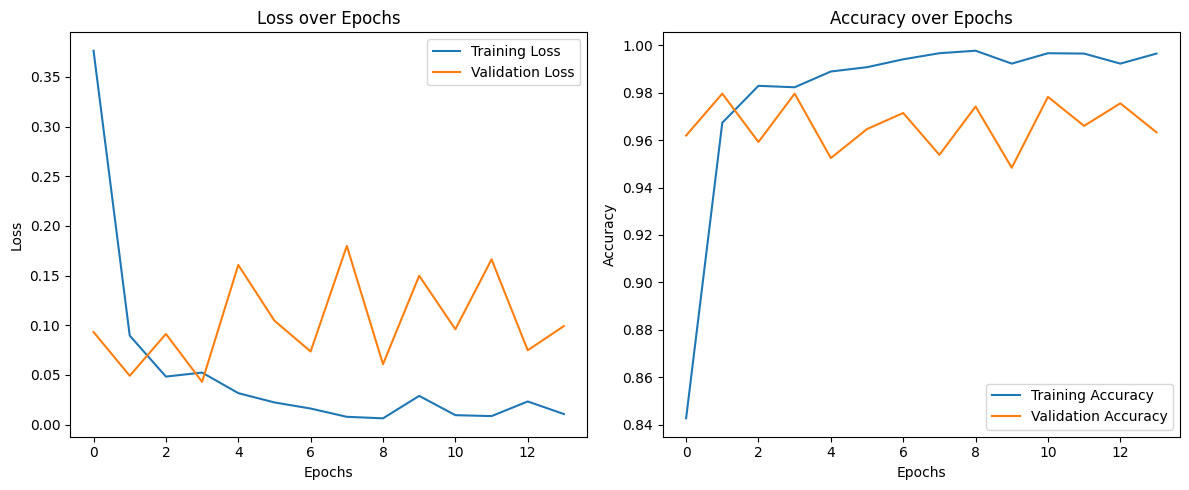

In [20]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history['loss'], label='Training Loss')
ax1.plot(history['val_loss'], label='Validation Loss')
ax1.set_title('Loss over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history['accuracy'], label='Training Accuracy')
ax2.plot(history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()